In [55]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
%matplotlib inline

## Making a dataset 
-of 2 features and 3 centers , Lets see if kmeans wil able to predict that clusters will b 3 or not 

In [28]:
x,y = make_blobs(n_features=2,n_samples=1000,centers=3,random_state=42)

In [29]:
x.shape

(1000, 2)

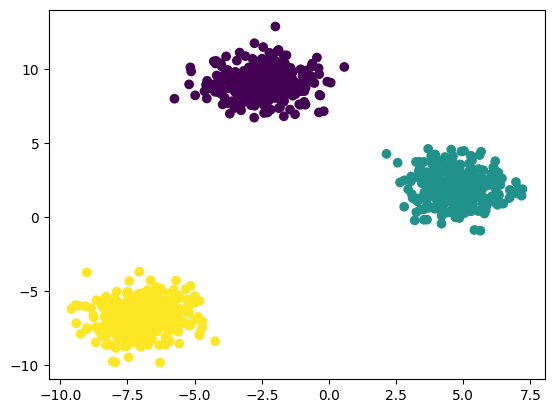

In [30]:
plt.scatter(x[:,0],x[:,1],c=y)

In [31]:
np.unique(y)

array([0, 1, 2])

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Calculating within cluster sum of series (wcss) 
-Using Model k-means++


In [33]:
wcss = []
for k in range(1,11):
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(x_train)
    wcss.append(model.inertia_)

The model gives elbow or knee at 3  <br />
We can also use KneeLocator for finding cluster 

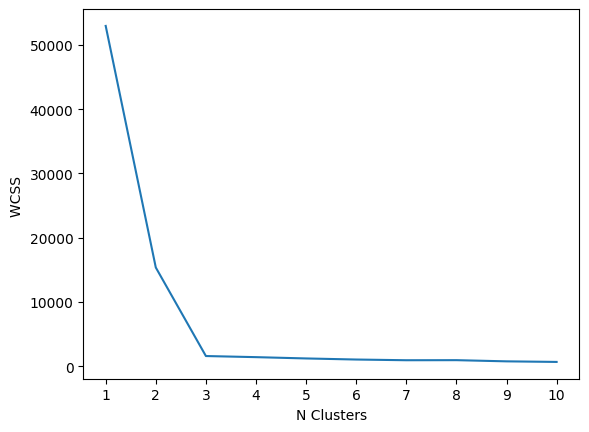

In [38]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("N Clusters")
plt.ylabel("WCSS ")
plt.show()

In [39]:
model = KMeans(n_clusters=3,init='k-means++')
y_pred = model.fit_predict(x_train)

For unsupervised Learning Algorithms silhouette score is used to measure Quality of Clustering/Performance  <br />
It ranges from -1 to +1 , Better towards +1  <br />
Our is nearly 0.8

In [56]:
silhouette_coeff  = []
for k in range(2,11):
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(x_train)
    score = silhouette_score(x_train,model.labels_)
    silhouette_coeff.append(score)

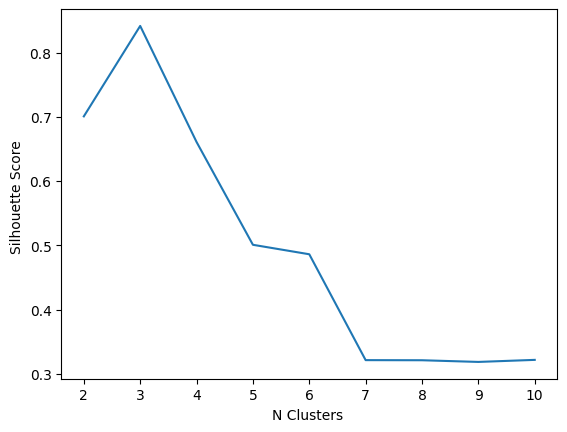

In [59]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("N Clusters ")
plt.ylabel("Silhouette Score ")
plt.show()